# CNN - 필기체 숫자를 분류할 수 있는 분류기 모델을 구성
 - Keras에 있는 MNIST 데이터셋을 사용
 - CNN 모델을 이용하여 분류기 모델을 구축 
 - Train : 40000개, Validation : 10000개, Test : 100000개 
 - 훈련 중 validation loss/ accuracy를 그래프로 표현 
 - Overfitting이 발생한 epoch 확인 
 - 모델을 새로 만들어 overfitting이 발생한 epoch 까지 다시 학습 
 - Test 데이터를 사용하여 모델 성능 평가 


In [ ]:
# 데이터 호출 
from tensorflow.keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# 데이터 분류 
x_raw = x_train.reshape(x_train.shape[0], 28, 28, 1)
y_raw = y_train

x_train = x_raw[:50000]
x_val = x_raw[50000:]

y_train = y_raw[:50000]
y_val = y_raw[50000:]

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# one hot encoding 
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_val /=255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 valid samples
10000 test samples


In [ ]:
# 모델 구성하기 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
# 모델 학습 
history = model.fit(x_train, y_train, 
                 epochs=10, 
                 batch_size=128,
                 validation_data=(x_val, y_val))

Epoch 1/10
391/391 [==============================] - 34s 10ms/step - loss: 0.3136 - acc: 0.9068 - val_loss: 0.0946 - val_acc: 0.9722
Epoch 2/10
391/391 [==============================] - 3s 9ms/step - loss: 0.0948 - acc: 0.9712 - val_loss: 0.0718 - val_acc: 0.9800
Epoch 3/10
391/391 [==============================] - 3s 9ms/step - loss: 0.0708 - acc: 0.9780 - val_loss: 0.0538 - val_acc: 0.9852
Epoch 4/10
391/391 [==============================] - 3s 9ms/step - loss: 0.0586 - acc: 0.9822 - val_loss: 0.0641 - val_acc: 0.9831
Epoch 5/10
391/391 [==============================] - 3s 9ms/step - loss: 0.0521 - acc: 0.9842 - val_loss: 0.0455 - val_acc: 0.9874
Epoch 6/10
391/391 [==============================] - 3s 9ms/step - loss: 0.0476 - acc: 0.9859 - val_loss: 0.0435 - val_acc: 0.9874
Epoch 7/10
391/391 [==============================] - 3s 9ms/step - loss: 0.0432 - acc: 0.9869 - val_loss: 0.0419 - val_acc: 0.9894
Epoch 8/10
391/391 [==============================] - 3s 9ms/step - loss: 

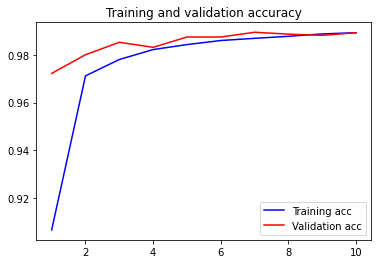

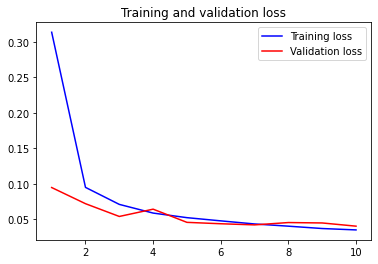

In [ ]:
# 그래프 그려 확인하기 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# accuracy
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# loss 
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 재검증 (epoch=4 로 재훈련 )
history = model.fit(x_train, y_train, 
                 epochs=4, 
                 batch_size=128,
                 validation_data=(x_val, y_val))

Epoch 1/4
391/391 [==============================] - 4s 9ms/step - loss: 0.0322 - acc: 0.9901 - val_loss: 0.0348 - val_acc: 0.9907
Epoch 2/4
391/391 [==============================] - 3s 9ms/step - loss: 0.0308 - acc: 0.9905 - val_loss: 0.0370 - val_acc: 0.9902
Epoch 3/4
391/391 [==============================] - 3s 9ms/step - loss: 0.0289 - acc: 0.9908 - val_loss: 0.0384 - val_acc: 0.9898
Epoch 4/4
391/391 [==============================] - 3s 8ms/step - loss: 0.0273 - acc: 0.9912 - val_loss: 0.0387 - val_acc: 0.9903


In [ ]:
# 성능 평가 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03180479630827904
Test accuracy: 0.9907000064849854
